In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# 1. Introduction
blablabla

ball

## 1.1 Table of Content

blablalb

# 2.0 Hands-on
## 2.1 Importing relevant libraries

In [2]:
# Importing standard python libraries
from pathlib import Path
from typing import List
import traceback
import timeit

# Import externally installed libraries
# -- Calculation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numba as nb
from numpy import complex_, int_, bool_, ndarray
from tqdm import tqdm

# -- Image and GIF generation
from IPython.display import clear_output
from celluloid import Camera

# -- Qiskit Libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *  # plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import QasmSimulator
from ibm_quantum_widgets import *  # CircuitComposer

# Import project-modules
from utils.fractal_julia_calculations import set_1cn0, set_2cn1, set_2cn2#, set_NcnN
from utils.fractal_quantum_circuit import FractalQuantumCircuit
from utils.fractal_visualization import QuantumFractalVisualization
from utils.fractal_julia_arrays import GetJuliaArrays

## 2.2 Defining the Quantum Circuit
It is perfectly

Start with an one qubit quantum circuit yielding a nice fractal. Change the circuit as you like.


In [3]:
# Define the number of Qubits
n_qubit = 1

# Create the Quantum Circuit either by coding it or by using the CircuitComposer
circuit = QuantumCircuit(n_qubit)
circuit.h(0)

# Method to save Open the CircuitComposer
editor = CircuitComposer(circuit=circuit); display(editor)

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1078177c0>)

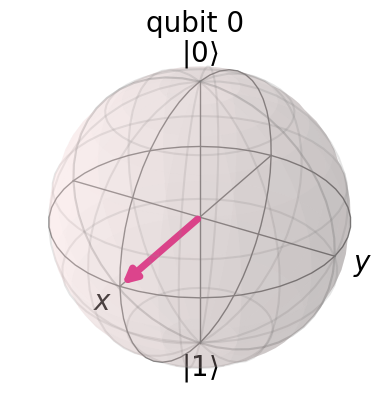

In [4]:
# Visualize the Bloch sphere(s) based on the Quantum Circuit defined above.
if n_qubit > 10:
    display("Plotting more than 10 bloch spheres causes the notebook to slow down significantly")
else:
    display(plot_bloch_multivector(editor.circuit))

## 2.3 Define the Fractal Calculation parameters

In [5]:
# Define coordinate height, width and size values for the resulting Julia image arrays
# ──────────────────────────────────────────────────────────────────────────────────────────────────────────
# Image generation and animation values
GIF_ms_intervals: int = 100  # 200ms = 5 fps
number_of_frames: int = 90   # Total number of frames to generate

# Coordinate height, width and zoom
height: int = 300
width: int  = 300
zoom: float = 1.0

# Coordinate intervals
x_start: float = 0.0
x_width: float = 1.5

y_start: float = 0.0
y_width: float = 1.5


# Define the number of iterations before the magnitude of z exceeds the defined escape value
# ──────────────────────────────────────────────────────────────────────────────────────────────────────────
julia_iterations: int = 100
julia_escape_val: int = 2


# Create the basis 2D array for the fractal
# ──────────────────────────────────────────────────────────────────────────────────────────────────────────
get_julia_arrays = GetJuliaArrays(julia_iterations, x_start, x_width, y_start, y_width, height, width, zoom)

# Array with the evenly spaced numbers over the width- and height interval specified above
z_arr = get_julia_arrays.get_z_array()

# Array to keep track of which iteration that causes the points to diverge
div_arr = get_julia_arrays.get_diverged_array()

# Array to keep track of which points have not converged for each iteration
con_arr = get_julia_arrays.get_converging_array()

## Calculate Quantum Fractals


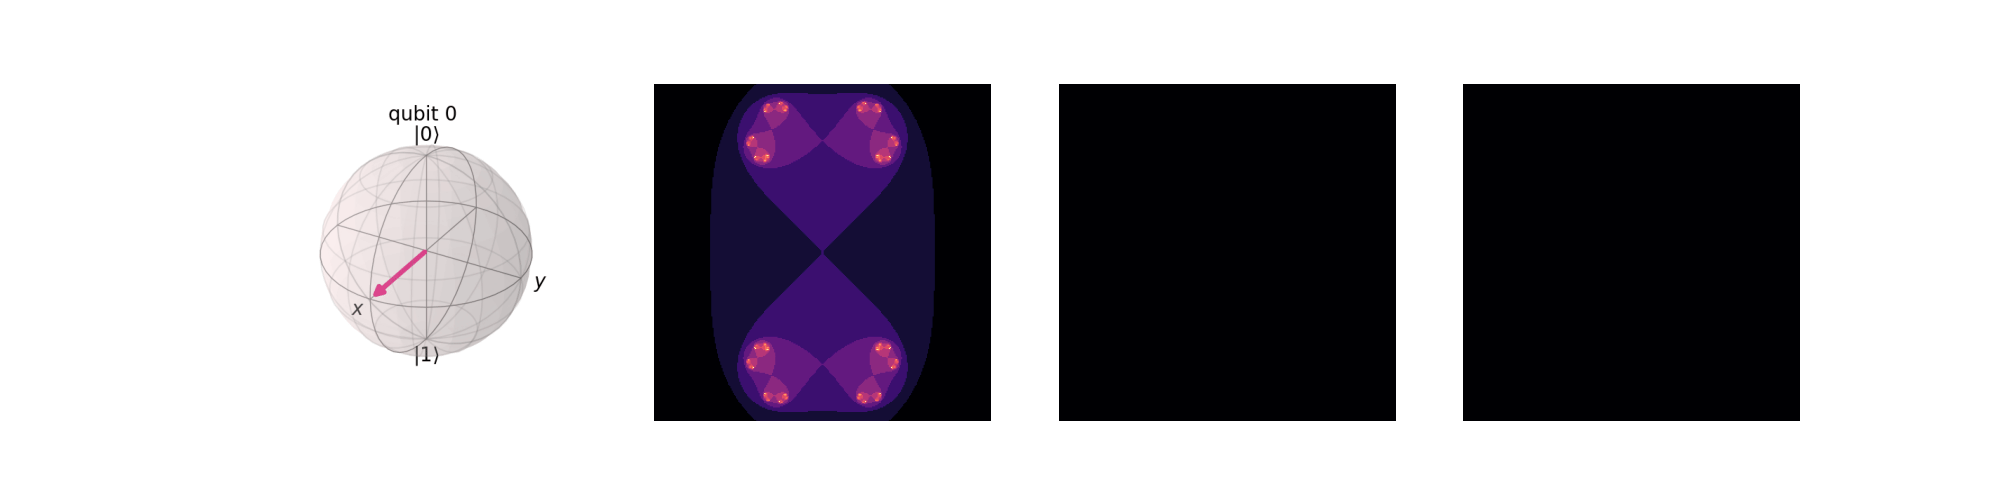

In [6]:
fractal_circuit = FractalQuantumCircuit(number_of_qubits=1, quantum_circuit=editor.circuit, total_number_of_frames=number_of_frames)
fractal_visuals = QuantumFractalVisualization()

for frame in tqdm(range(0, number_of_frames)):
    # Perform a Latitudinal Rotation on any given Qubit defined by "rotate"
    cno, ccircuit, ccn = fractal_circuit.get_quantum_circuit(rotate="First", frame_iteration=frame)

    # Perform the Julia Set Calculations
    julia1 = set_1cn0(c=cno, z=z_arr.copy(), con=con_arr.copy(), div=div_arr.copy(), height=height, width=width)
    julia2 = set_2cn1(c=ccn, z=z_arr.copy(), con=con_arr.copy(), div=div_arr.copy(), height=height, width=width)
    julia3 = set_2cn2(c=ccn, z=z_arr.copy(), con=con_arr.copy(), div=div_arr.copy(), height=height, width=width)
    
    # Save both the Quantum circuit and Julia Calculation results in a visualisation list
    visualization_data = [ccircuit, julia1, julia2, julia3]

    # Parse the visualization data to both the image and animation generators
    fractal_visuals.qf_images(viz_data=visualization_data, frame=frame)
    fractal_visuals.qf_animation(viz_data=visualization_data, frame=frame)

# Finally, after the loop for all the frames has finished, the final GIF is created and shown
fractal_visuals.save_animation(blit=True, interval_ms=GIF_ms_intervals, no_frames=number_of_frames)